In [1]:
# auto-load when code changes outside
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0,'..')


In [2]:
import numpy as np
import streamlit as st
from copy import deepcopy as dc
import pandas as pd
from pathlib import Path
from src.label_checker_automata import LabelCheckerAutomata
from src.caption import Caption
import src.utils as utils

2023-06-09 11:15:38.778 INFO    numexpr.utils: Note: NumExpr detected 64 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2023-06-09 11:15:38.779 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


In [3]:
data_dir = Path("../data/new/images")

labels = []

for image_fn in data_dir.iterdir():
    if image_fn.suffix == ".jpg" and not image_fn.name.startswith("."):
        labels.append("_".join(image_fn.stem.split("_")[1:]))

df = pd.DataFrame.from_dict({
    "label": labels,
})
df

,label
0,S AOGB 3 annulets & chief ch. lion isst & label
1,G A cross potenty
2,lion; lion q.f. {OS; BO}
3,O B lion rampant
4,"fess; eagle doubleheaded; =; = {OS, SA}"
...,...
577,"cross; gonfanon; =; = {GA, AG}"
578,B A lion rampant
579,A G eagle cr.
580,G O lion rampant


In [20]:
root_folder_images = "../data/new/"

train_annotation_file = root_folder_images + '/full-train_captions_psumsq.txt'
val_annotation_file  = root_folder_images + '/full-val_captions_psumsq.txt'
test_annotation_file  = root_folder_images + '/full-test_captions_psumsq.txt'

df1 = pd.read_csv(train_annotation_file)
print("There are {} train images".format(len(df1)))

df2 = pd.read_csv(val_annotation_file)
print("There are {} val images".format(len(df2)))

df3 = pd.read_csv(test_annotation_file)
print("There are {} test images".format(len(df3)))


There are 117 train images
There are 39 val images
There are 39 test images


In [21]:
def count_charges(df):
    train_captions = df['caption']
    count_lion, count_cross, count_eagle = 0,0,0
    count_lions, count_crosses, count_eagles = 0,0,0
    
    for c in train_captions:
        if "lion" in c:
            count_lion+=1
        if "eagle" in c:
            count_eagle+=1
        if "cross" in c:
            count_cross+=1
        
        if "lions" in c:
            count_lions+=1
        if "eagles" in c:
            count_eagles+=1
        if "crosses" in c:
            count_crosses+=1

            
    print("Lion count:", count_lion) 
    print("Eagle count:", count_eagle) 
    print("Cross count:", count_cross)

    print("Lions count:", count_lions) 
    print("Eagles count:", count_eagles) 
    print("Crosses count:", count_crosses)

    print("--------------------------------------")
    
    print("Lion ration:", round(count_lion/len(train_captions), 2))
    print("Eagle ration:", round(count_eagle/len(train_captions), 2)) 
    print("Cross ration:", round(count_cross/len(train_captions), 2)) 

    print("Lions ration:", round(count_lions/len(train_captions), 2))
    print("Eagles ration:", round(count_eagles/len(train_captions), 2)) 
    print("Crosses ration:", round(count_crosses/len(train_captions), 2)) 

    print("--------------------------------------")
    
    df = pd.DataFrame({'mass': [count_lion, count_eagle, count_cross, count_lions, count_eagles, count_crosses],
                   'radius': [2439.7, 6051.8, 6378.1,2439.7, 6051.8, 6378.1]},
                  index=['count_lion', 'count_eagle', 'count_cross', 'count_lions', 'count_eagles', 'count_crosses'])
    plot = df.plot.pie(y='mass', figsize=(5, 5))
        
    print("--------------------------------------")

    return count_lion, count_eagle, count_cross, count_lions, count_eagles, count_crosses


Train
Lion count: 55
Eagle count: 32
Cross count: 30
Lions count: 20
Eagles count: 4
Crosses count: 0

Val
Lion count: 22
Eagle count: 9
Cross count: 8
Lions count: 5
Eagles count: 1
Crosses count: 0

Test
Lion count: 18
Eagle count: 14
Cross count: 7
Lions count: 2
Eagles count: 4
Crosses count: 0

Train
Lion count: 56
Eagle count: 29
Cross count: 32
Lions count: 14
Eagles count: 5
Crosses count: 0
--------------------------------------
Lion ration: 0.48
Eagle ration: 0.25
Cross ration: 0.27
Lions ration: 0.12
Eagles ration: 0.04
Crosses ration: 0.0
--------------------------------------
--------------------------------------


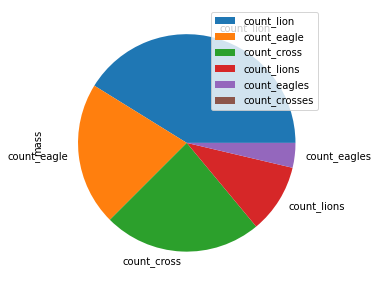

In [23]:
print("Train")
count_lion, count_eagle, count_cross, count_lions, count_eagles, count_crosses = count_charges(df1)



Val
Lion count: 19
Eagle count: 17
Cross count: 3
Lions count: 7
Eagles count: 3
Crosses count: 0
--------------------------------------
Lion ration: 0.49
Eagle ration: 0.44
Cross ration: 0.08
Lions ration: 0.18
Eagles ration: 0.08
Crosses ration: 0.0
--------------------------------------
--------------------------------------


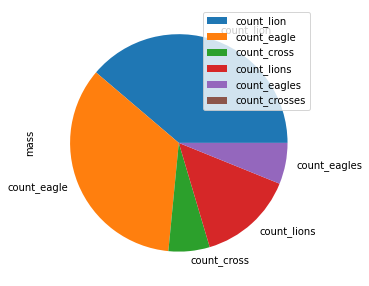

In [24]:
print("Val")
count_lion, count_eagle, count_cross, count_lions, count_eagles, count_crosses = count_charges(df2)


Test
Lion count: 20
Eagle count: 9
Cross count: 10
Lions count: 6
Eagles count: 1
Crosses count: 0
--------------------------------------
Lion ration: 0.51
Eagle ration: 0.23
Cross ration: 0.26
Lions ration: 0.15
Eagles ration: 0.03
Crosses ration: 0.0
--------------------------------------
--------------------------------------


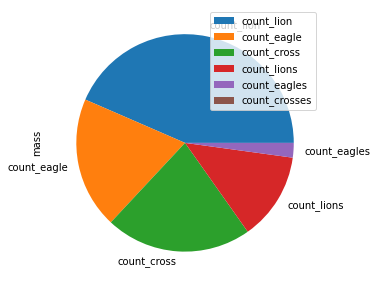

In [25]:
print("Test")

count_lion, count_eagle, count_cross, count_lions, count_eagles, count_crosses = count_charges(df3)
